# SUPERPIXEL SEGMENTATION 

In [1]:
# all import statements
import numpy as np
import pandas as pd
import pydicom as pyd
import os
import matplotlib.pyplot as plt
import mudicom

from os.path import dirname, join
from pydicom.data import get_testdata_files
from pydicom.filereader import read_dicomdir
from PIL import Image

from scipy.misc import imresize
from scipy.signal import convolve2d
import scipy
from skimage.segmentation import slic
from skimage.segmentation import mark_boundaries

from numpy import newaxis

## IMAGE EXTRACTION

In [2]:
PATH = 'data/stage_2_train_images/'

lstFilesDCM = []  
for dirName, subdirList, fileList in os.walk(PATH):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

len(lstFilesDCM)

dcm_40 = []
for img in range(40):
    dcm_40.append(lstFilesDCM[img])

dcm_np = []
pat_ids = []
for dcm in dcm_40:
    pat_ids.append(dcm.split('/')[2].split('.')[0])
    img = mudicom.load(dcm)
    img = img.image
    img = img.numpy
    dcm_np.append(img)


def show(img, title=None):
    plt.imshow(img, cmap=plt.cm.bone)
    if title is not None: plt.title = title

def plots(ims, figsize=(12,6), rows=2, titles=None):
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], cmap=plt.cm.bone)

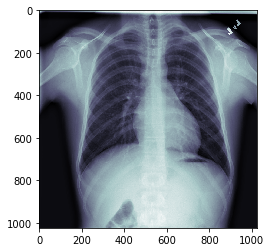

In [3]:
show(dcm_np[33])

In [9]:
import cv2
from skimage.util import img_as_float

In [20]:
image = dcm_np[3]

In [16]:
# !pip3 install -U opencv-python

In [62]:
segments = slic(img_as_float(image), n_segments=200, sigma=5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


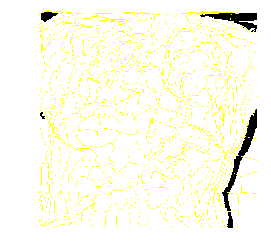

In [63]:
# fig = plt.figure("Superpixels")
# ax = fig.add_subplot(1, 1, 1)
plt.axis("off")
plt.imshow(mark_boundaries(image, segments))



In [64]:
np.unique(segments)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

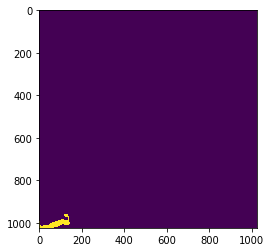

In [65]:
for (i, segVal) in enumerate(np.unique(segments)):
    mask = np.zeros(image.shape[:2], dtype = "uint8")
    mask[segments == segVal] = 255
    
    plt.imshow(mask)
#     plt.imshow(cv2.bitwise_and(image, image, mask = mask))

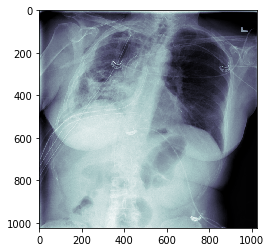

In [30]:
show(image)

In [75]:
# hsv_image = cv2.cvtColor(image,  cv2.COLOR_BGR2HSV)

In [76]:
light_orange = (1, 190, 200)
dark_orange = (18, 255, 255)

In [77]:
mask = cv2.inRange(image, light_orange, dark_orange)

error: OpenCV(4.0.0) /Users/travis/build/skvark/opencv-python/opencv/modules/core/src/arithm.cpp:1736: error: (-209:Sizes of input arguments do not match) The lower boundary is neither an array of the same size and same type as src, nor a scalar in function 'inRange'
